# IMMAS Test Your Mammogram Notebook

A notebook, which requires  an image as input. It shows preprocessing, segementation, feature extraction, and classification.

Installing the IMMAS package for Python 3 environments:

1. Download project repository using this [link](https://github.com/OlehKSS/IMMAS).
2. From the root folder of the project execute `python setup.py install`, `setup.py` is a file in the root folder.
3. This script should download all the modules `immas` relies on, you can run code from this notebook afterwards.
4. Enjoy!

Detail on project installation using virtual environments can be found on the project GitHub page, follow the link above.

## Import Modules

In [1]:
# Test immas package installation
import immas

In [2]:
# Import required packages
from immas import preprocessing, segmentation, features, classification, basic_functions
import sklearn
import pickle
import cv2

## Import a Test Image

In this example we show how to work with ordinary images. In `immas` module we also have `MammogramImage` class, which is an additional abstraction layer for working with images, it incorporates useful functions for simplification of routine work. 

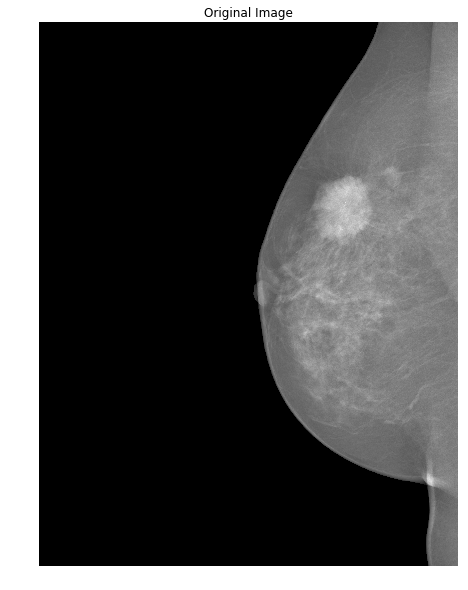

In [4]:
###### Set path to image to operate upon #####
file_path = "../dataset/masses_examples/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
image = cv2.imread(file_path,0)
basic_functions.show_image_plt(image,"Original Image")

## Preprocessing and Segmentation

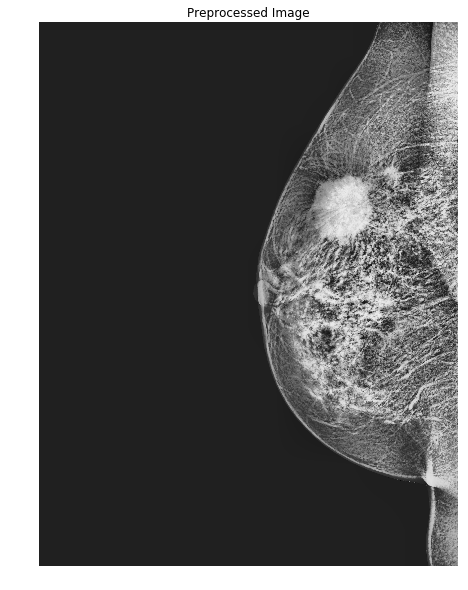

In [5]:
# Preprocess the image using openning with a 5x5 kernel, morphological enchancement
# with a 20x20 kernel and clahe kernel of 12, and perform a wavelet transform using
# a kernel sized 5
preprocessed_image = preprocessing.fullPreprocessing(image)
basic_functions.show_image_plt(preprocessed_image,"Preprocessed Image")

/home/okozyn/Projects/immas/immas/segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


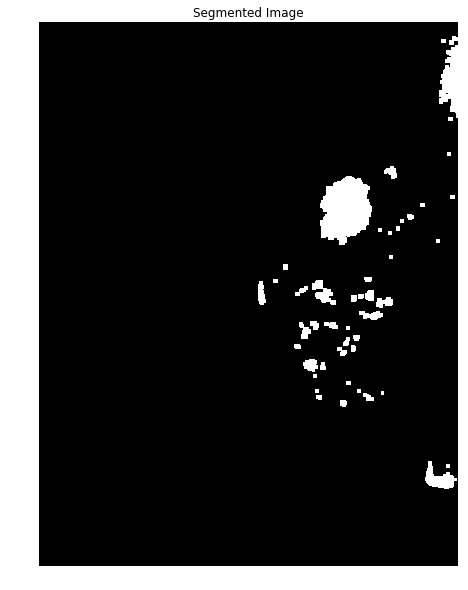

In [6]:
# Segment the preprocessed image using multithrehsolding with 2 thresholds, opening with a
# 23x23 kernel, and closing with a 5x5 kernel

segmented_image = segmentation.fullSegmentation(preprocessed_image)
basic_functions.show_image_plt(segmented_image,"Segmented Image")

## Feature Extraction and Classification

Extract features each region in the image, preprocessing and segmentation are done internally 
by the `get_img_features function`. In this example you can see all the features, including LBP.

In [13]:
features_df, regions, _ = features.get_img_features(image, contour_max_number=None)
features_df = features_df.drop(['class_id'], axis=1)
features_df

/home/okozyn/Projects/immas/immas/segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_image-0.13.1-py3.6-linux-x86_64.egg/skimage/feature/texture.py:109: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(image.dtype, np.float):
/home/okozyn/Projects/immas/immas/features/intensity.py:232: RuntimeWarning: overflow encountered in ubyte_scalars
  gradient[i] = img[contour[:, 0][i][1], contour[:, 0][i][0]] - img[y2, x2]


,perimeter,area,circularity,ac,shape_factor,mean NRL,SD NRL,Ratio SD NRL and mean RL,entropy NRL,NCPS,...,LBP990,LBP991,LBP992,LBP993,LBP994,LBP995,LBP996,LBP997,LBP998,LBP999
0,1597.605119,96899.5,2.096078,46228.952115,26.340096,0.764839,0.104351,0.000592,5.643010,0.001557,...,0.08,0.20,0.20,0.00,0.00,0.08,0.12,0.08,0.04,0.20
1,1613.195958,34340.0,6.030650,5694.245606,75.783378,0.535811,0.223266,0.001596,4.852404,0.003640,...,0.12,0.24,0.04,0.08,0.08,0.20,0.00,0.04,0.12,0.08
2,749.438599,16230.5,2.753787,5893.883502,34.605109,0.573099,0.205435,0.002820,4.540839,0.005009,...,0.16,0.12,0.12,0.00,0.04,0.16,0.00,0.04,0.08,0.28
3,751.639609,11047.5,4.069541,2714.679532,51.139362,0.548036,0.198734,0.003408,4.566694,0.000724,...,0.08,0.00,0.12,0.40,0.32,0.00,0.00,0.00,0.00,0.08
4,345.112698,5614.0,1.688261,3325.315095,21.215314,0.783352,0.094270,0.002314,3.864010,0.007944,...,0.20,0.08,0.04,0.16,0.08,0.12,0.04,0.08,0.08,0.12
5,428.325901,5115.5,2.853979,1792.410042,35.864153,0.463453,0.228763,0.006244,4.107837,0.009385,...,0.12,0.12,0.12,0.08,0.04,0.16,0.04,0.04,0.04,0.24
6,363.840620,4886.5,2.155830,2266.643947,27.090964,0.658190,0.242313,0.004794,3.966450,0.004427,...,0.04,0.04,0.08,0.36,0.24,0.08,0.00,0.00,0.00,0.16
7,369.455844,4822.0,2.252620,2140.618112,28.307263,0.625011,0.250642,0.006949,3.672944,0.004438,...,0.08,0.08,0.04,0.28,0.12,0.16,0.00,0.04,0.04,0.16
8,323.455844,3908.0,2.130422,1834.378581,26.771669,0.650763,0.215285,0.006681,3.701680,0.012671,...,0.04,0.12,0.16,0.28,0.08,0.20,0.04,0.00,0.04,0.04
9,361.455844,3906.0,2.661757,1467.451787,33.448624,0.535556,0.192589,0.005760,3.573128,0.006192,...,0.08,0.08,0.20,0.12,0.00,0.24,0.00,0.04,0.08,0.16


In [22]:
# our best classifiers were trained on subset of features, without LBP, here we select this subset.
features_df = features_df[['perimeter', 'area', 'circularity', 'ac', 'shape_factor', 'mean NRL',
                           'SD NRL', 'Ratio SD NRL and mean RL', 'entropy NRL', 'NCPS',
                           'mean_intensity', 'standard_deviation', 'smoothness', 'skewness',
                           'kurtosis', 'correlation', 'contrast', 'uniformity', 'homogeneity',
                           'energy', 'dissimilarity', 'gradient mean', 'gradient SD',
                           'gradient skewness']]

features_df

,perimeter,area,circularity,ac,shape_factor,mean NRL,SD NRL,Ratio SD NRL and mean RL,entropy NRL,NCPS,...,kurtosis,correlation,contrast,uniformity,homogeneity,energy,dissimilarity,gradient mean,gradient SD,gradient skewness
0,1597.605119,96899.5,2.096078,46228.952115,26.340096,0.764839,0.104351,0.000592,5.643010,0.001557,...,32326.103878,1.0,0.0,1.0,1.0,1.0,0.0,42.719298,84.856609,2.054369
1,1613.195958,34340.0,6.030650,5694.245606,75.783378,0.535811,0.223266,0.001596,4.852404,0.003640,...,1766.264453,1.0,0.0,1.0,1.0,1.0,0.0,145.007143,123.612557,-0.288028
2,749.438599,16230.5,2.753787,5893.883502,34.605109,0.573099,0.205435,0.002820,4.540839,0.005009,...,313994.731407,1.0,0.0,1.0,1.0,1.0,0.0,113.564356,113.047910,0.362300
3,751.639609,11047.5,4.069541,2714.679532,51.139362,0.548036,0.198734,0.003408,4.566694,0.000724,...,5143.540173,1.0,0.0,1.0,1.0,1.0,0.0,100.932039,119.663303,0.456260
4,345.112698,5614.0,1.688261,3325.315095,21.215314,0.783352,0.094270,0.002314,3.864010,0.007944,...,1305.942163,1.0,0.0,1.0,1.0,1.0,0.0,61.562500,104.136110,1.285960
5,428.325901,5115.5,2.853979,1792.410042,35.864153,0.463453,0.228763,0.006244,4.107837,0.009385,...,3043.412174,1.0,0.0,1.0,1.0,1.0,0.0,73.043478,109.855034,1.004015
6,363.840620,4886.5,2.155830,2266.643947,27.090964,0.658190,0.242313,0.004794,3.966450,0.004427,...,2339.322993,1.0,0.0,1.0,1.0,1.0,0.0,21.842105,34.491183,5.407154
7,369.455844,4822.0,2.252620,2140.618112,28.307263,0.625011,0.250642,0.006949,3.672944,0.004438,...,3242.300341,1.0,0.0,1.0,1.0,1.0,0.0,96.325581,120.533257,0.528747
8,323.455844,3908.0,2.130422,1834.378581,26.771669,0.650763,0.215285,0.006681,3.701680,0.012671,...,1350.369155,1.0,0.0,1.0,1.0,1.0,0.0,86.000000,115.680997,0.742860
9,361.455844,3906.0,2.661757,1467.451787,33.448624,0.535556,0.192589,0.005760,3.573128,0.006192,...,10044.057487,1.0,0.0,1.0,1.0,1.0,0.0,121.894737,123.893798,0.104351


In [24]:
# Normalize features to run the classifier
features_data = features_df.as_matrix()
features_data = sklearn.preprocessing.StandardScaler().fit_transform(features_data)
# Import the SVM and Random Forest classifiers
with open("./models/SVM_classifier.pkl", "rb") as fid:
    SVM_classifier = pickle.load(fid)
with open("./models/rf_class_no_lbp.pkl", "rb") as fid:
    RF_classifier = pickle.load(fid)

### SVM Classifier

Configuration parameters of the pre-trained SVM classifier used below are as follows:
```
SVC(C=10, class_weight={1: 20}, gamma=0.0001, kernel='rbf', probability=True)
```

SVM Predictions: [ 1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Number of masses detected is 1


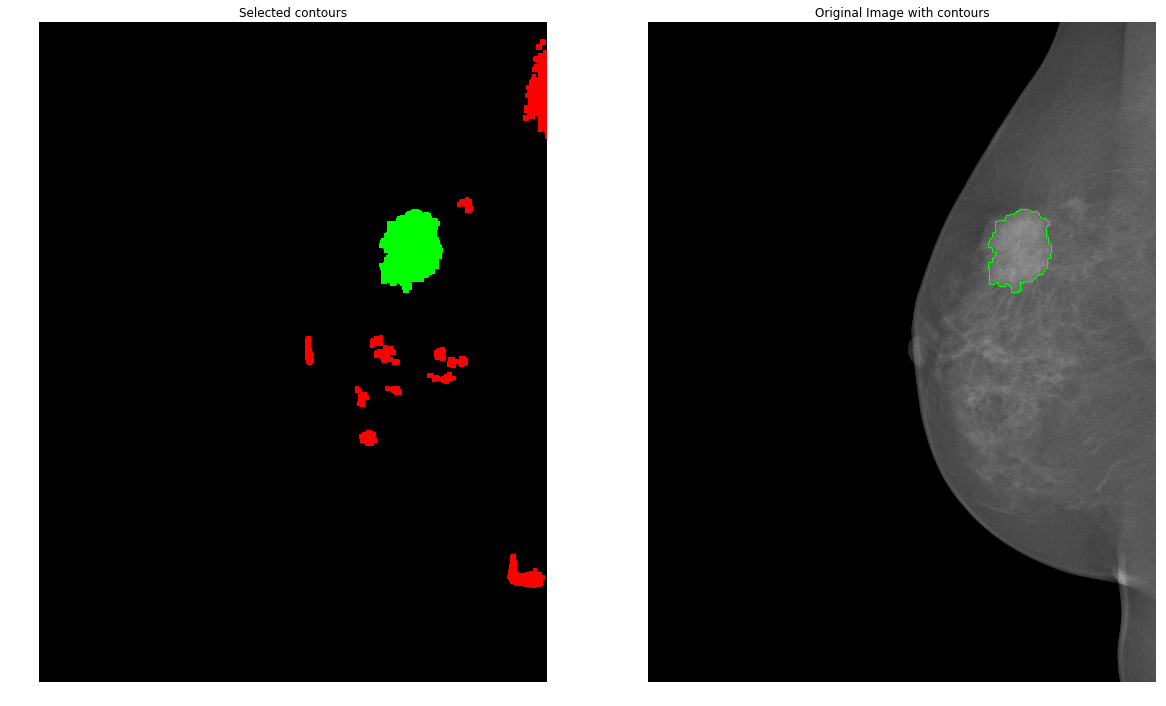

In [25]:
# Run the SVM classifier for the image and output region predictions
predictionsSVM = SVM_classifier.predict(features_data)
print("SVM Predictions:", predictionsSVM)
# Display a visual result for the SVM classifier
basic_functions.show_pos_neg_regions(image,regions,predictionsSVM)

### Random Forests Classifier

Configuration parameters of the pre-trained random forests classifier used below are as follows:
```
 RandomForestClassifier(n_estimators=1000,
                        max_features='sqrt',
                        min_samples_leaf=50,
                        class_weight='balanced',
                        oob_score=True)
```

Random Forest Predictions: [ 1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Number of masses detected is 1


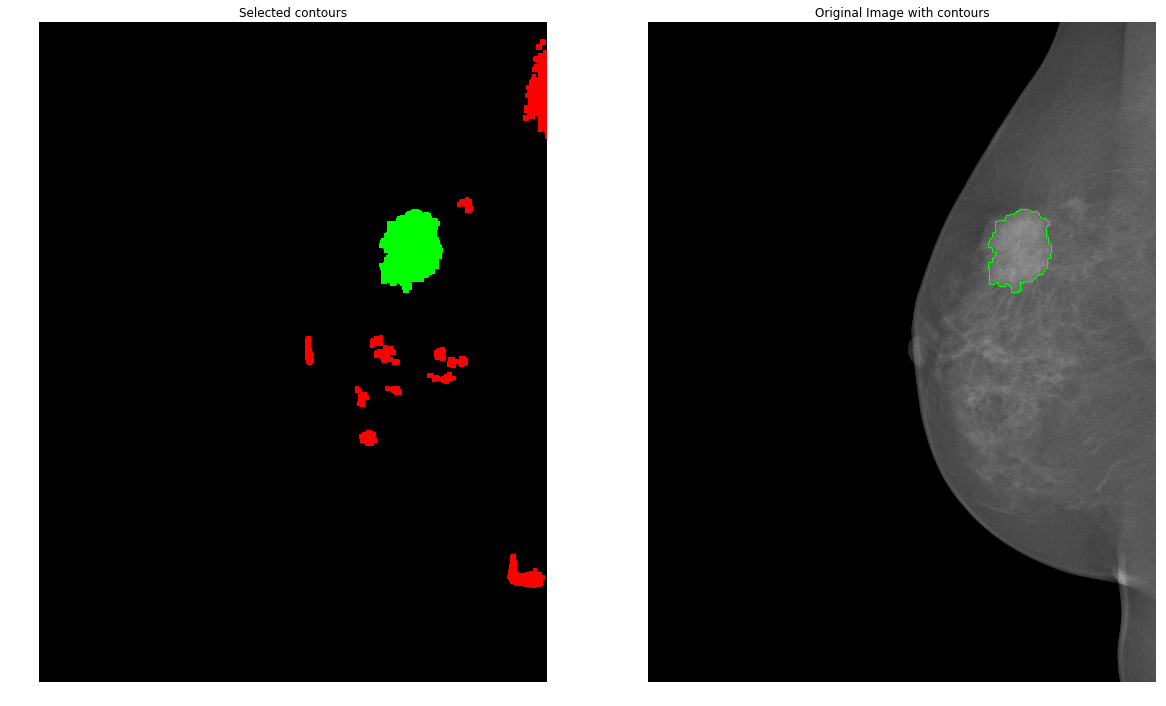

In [26]:
# Run the Random Forest classifier for the image and output region predictions
predictionsRF = RF_classifier.predict(features_data)
print("Random Forest Predictions:", predictionsRF)
# Display a visual result for the Random Forest classifier
basic_functions.show_pos_neg_regions(image,regions,predictionsRF)